In [47]:
import pandas as pd
import numpy as np
import re

In [48]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [49]:
# read all the csv files
df = pd.read_csv("data/findmyguitars.csv")
bridge_df = pd.read_csv("data/bridge_df.csv") # contains the guitar url and category of bridge type  
body_shape_df = pd.read_csv("data/body_shape_df.csv") # contains the guitar url and category of body shape

In [50]:
df.shape,bridge_df.shape,body_shape_df.shape

((1663, 91), (1349, 2), (1663, 2))

In [51]:
# drop the row that has no price information
df = df[~pd.isnull(df.Price)]
df.shape

(1604, 91)

In [52]:
# join the dataframes by URLs
df = pd.merge(df, bridge_df,how='left', on='Link')
df = pd.merge(df, body_shape_df,how='left', on='Link')

df.head()

,Link,Model,Specs,Matched,Brand,Year,Configuration,Strings,Made in,Series,Colors,Left-Handed Version,Top,Type,Body Material,Bridge,Neck Joint,Tuners,Fretboard,Neck Material,Decoration,Scale Size,Shape,Thickness,Frets,Fretboard Radius,Nut,Nut Width,Switch,Knobs,Pickup Mods,Volume Controls,Tone Controls,Bridge Pickup,Neck Pickup,Middle Pickup,Price,Tremolo,Locking Tuners,Retainer Bar,Stainless Steel Frets,Made in United States,Expensive Wood,Locking Nut,Top Pickup Brand,Neck-Through Build,Push Knob or Extra Switch Option,Weight Relief,Stays in Tune (Evertune),21:1 Tuner Ratio,Compound Radius Fretboard,Strap Lock,Luminescent Inlay,Body Material 2,Neck Material 2,Fretboard Material 2,Sustainer Pickups,High-Quality-Standards Country,Coil Split Pickups,Made in Japan,"Coil Split, Killswitch Pickups","Coil Split, Multi-Voicing Pickups","Multi-Voicing, Sustainer Pickups",Coil Tap Pickups,Ivory Tusq Nut,Bone Nut,Multi-Voicing Pickups,High-Quality Nut,Black Tusq XL Nut,Series Split Pickups,Parallel Split Pickups,S-1 Switch Pickups,Killswitch Pickups,"Coil Split, Capacitance Selector Pickups","Coil Tap, Phase Out Pickups",Boneite Nut,NuBone Nut,Synthetic Bone Nut,"Killswitch, Sustainer Pickups",Boost Pickups,"Multi-Voicing, Gain Reduction Pickups","Coil Split, Boost Pickups",Phase Out Pickups,"Killswitch, Phase Out Pickups",High-Pass Filter Pickups,Half-Bone/Half-Brass Nut,"Coil Tap, Boost Pickups","Coil Split, Phase Out Pickups",Varitone Pickups,Tri-Sound Pickups,Neck Shape,Bridge Type,Body Shape
0,https://findmyguitar.com/reviews/Schecter-Bans...,Schecter Banshee Mach-6 FR S,From Schecter's 2020 Banshee Mach series\nMade...,False,Schecter,2020.0,HH,6.0,South Korea,Banshee Mach,"Black Burst, Natural Burst",Yes,Flamed Maple,Solid Body,Swamp Ash,Floyd Rose 1500 Series,Neck-Through,Grover Rotomatic 18:1,Ebony,Roasted Maple/Purpleheart Multi-ply with Carbo...,Offset/Reverse Roman Numerals,"25.5""",Ultra Thin U,1st Fret: 0.748'' (19mm) - 12th Fret: 0.787'' ...,24 XL Jumbo Yes,"12"" to 16""",Locking,41.3mm (1.625''),3 Way,Dome,Sustainer,1.0,1.0,Lundgren M6 (Humbucker / Passive),Sustainiac (Humbucker / Passive),NaN,1357.600,True,False,True,True,NaN,True,True,True,True,NaN,False,False,False,True,False,True,Ash,Roasted Maple,Ebony,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,It has a U type neck.,Floyd Rose,Super Strat
1,https://findmyguitar.com/reviews/ESP-E-II-Hori...,ESP E-II Horizon FR-II,From ESP E-II's 2021 Horizon series\nMade in J...,True,ESP E-II,2021.0,HH,6.0,Japan,Horizon,"Tiger Eye Sunburst, See Thru Black Cherry Sunb...",Yes,Quilted Maple,Solid Body,Mahogany,Floyd Rose Original,Neck-Through,Gotoh Locking,Ebony,3pc Maple,Offset Blocks,"25.5""",Thin U,1st Fret: 0.787'' (20mm) - 12th Fret: 0.866'' ...,24 XL Jumbo,"12""",Locking,42mm (1.654''),3 Way,Dome,Coil Split,1.0,1.0,EMG 57TW (Humbucker / Active),EMG 66TW (Humbucker / Active),NaN,2308.628,True,True,True,False,NaN,True,True,True,True,NaN,False,False,False,False,True,False,Mahogany,Maple,Ebony,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,It has a U type neck.,Floyd Rose,Super Strat
2,https://findmyguitar.com/reviews/Jackson-USA-S...,Jackson USA Signature Chris Broderick Soloist 6,From Jackson's 2016 Artist Signature series\nC...,False,Jackson,2016.0,HH,6.0,United States,Artist Signature,"White, Black, Red",No,1/8 Plain Maple,Solid Body,Mahogany,Floyd Rose Pro (Recessed),Neck-Through,Planet Waves Auto-Trim,Ebony,Quartersawn Maple,NaN,"25.5""",Jackson Standard,1st Fret: 0.79'' (20.1mm) - 12th Fret: 0.85'' ...,24 Jumbo,"12""",Locking,42.9mm (1.688''),3 Way,Dome,"Coil Split, Killswitch",1.0,1.0,Direct Mount Chris Broderick Designed Custom D...,Direct Mount Chris Broderick Designed Custom D...,NaN,3346.450,True,True,False,False,True,True,True,False,True,NaN,False,False,False,False,True,False,Mahogany,Mapl

In [53]:
df.isnull().sum()

Link                                           0
Model                                          0
Specs                                          2
Matched                                        2
Brand                                          0
Year                                           0
Configuration                                  0
Strings                                        0
Made in                                        0
Series                                         0
Colors                                         0
Left-Handed Version                            0
Top                                         1032
Type                                           0
Body Material                                  0
Bridge                                         0
Neck Joint                                     0
Tuners                                         0
Fretboard                                      0
Neck Material                                  0
Decoration          

In [54]:
df.Year.value_counts() 
# some years are missing between the 1990-2000 and 2000-2010
# they can be named as 1990s and 2000s

2020.0    377
2021.0    338
2019.0    212
2018.0    142
2022.0    135
2017.0     95
2015.0     74
2016.0     64
2014.0     59
2010.0     24
2011.0     17
2013.0     17
2012.0     13
2009.0      9
2006.0      9
2001.0      6
2008.0      5
2000.0      1
600.0       1
1992.0      1
2005.0      1
2004.0      1
2007.0      1
2002.0      1
1997.0      1
Name: Year, dtype: int64

In [55]:
df.Year = df.Year.apply(lambda x : "1990s" if x < 2000 else ("2000s" if x < 2010 else str(x)))
df.Year.value_counts()

2020.0    377
2021.0    338
2019.0    212
2018.0    142
2022.0    135
2017.0     95
2015.0     74
2016.0     64
2014.0     59
2000s      34
2010.0     24
2013.0     17
2011.0     17
2012.0     13
1990s       3
Name: Year, dtype: int64

In [56]:
print(df['Bridge Type'].value_counts(dropna=False))
print(df['Bridge'].value_counts()[:10])

Fixed             462
Tremolo           316
Floyd Rose        312
NaN               303
Bigsby Tremolo     79
Evertune           76
Edge               17
Edge Zero II       16
Kahler             13
Lo-Pro Edge         8
Edge Zero           2
Name: Bridge Type, dtype: int64
Evertune F-Type                                             46
Floyd Rose 1000 Series Double-Locking Tremolo (Recessed)    38
Floyd Rose 1500 Series                                      36
Tonepros Locking TOM & Tailpiece                            33
Floyd Rose Original                                         29
Hipshot Hardtail (.125) w/ String Thru Body                 25
Floyd Rose Special                                          24
F106                                                        23
Floyd Rose Special Double-Locking Tremolo (Recessed)        21
6-Saddle Vintage-Style Synchronized Tremolo                 21
Name: Bridge, dtype: int64


In [57]:
# function to fill missing 'Bridge Types' by 'Bridge'
def fill_bridge_type(x):
    if pd.isnull(x['Bridge Type']):
        if "Fixed" in x['Bridge']:
            return "Fixed"
        elif "Floyd Rose" in x['Bridge']:
            return "Floyd Rose"
        else:
            return None
    else:
        return x['Bridge Type']
    

print("NA values for Bridge Type:",df['Bridge Type'].isnull().sum())
df['Bridge Type'] = df.apply(fill_bridge_type,axis=1)
print("NA values for Bridge Type:",df['Bridge Type'].isnull().sum())

NA values for Bridge Type: 303
NA values for Bridge Type: 280


Some of the NaN <b>Bridge Type</b> values can be filled by the other guitars who has the same <b>Bridge</b> and not NaN Bridge Type. For example; on the below dataframe, 2 guitar has the <b>3-Saddle Custom Cut-Off Vintage-Style Tele Bridge with Compensated Brass Saddles </b>, one of them has the Bridge Type of Fixed, and the other has NaN value as Bridge Type. Therefore, we can fill the NaN value as <b>'Fixed'</b>. Also, when we examine all the dataframe just 'Fixed' bridge type has values other than NaN, and there are some records who has NaN values for all the Bridge Types. I can not think any other solution to fill the NaN values, so that I will fill the NaN values as 'Fixed' for all the Bridge Types.

In [58]:
bridges_and_types = df.groupby(['Bridge','Bridge Type'],dropna=False)['Bridge Type'].size().unstack()
bridges_and_types = bridges_and_types[bridges_and_types.iloc[:,-1] > 0] # get the NaN column that is greater than 1
bridges_and_types

Bridge Type,Bigsby Tremolo,Edge,Edge Zero,Edge Zero II,Evertune,Fixed,Floyd Rose,Kahler,Lo-Pro Edge,Tremolo,NaN
Bridge,,,,,,,,,,,
3-Saddle Custom Cut-Off Vintage-Style Tele Bridge with Compensated Brass Saddles,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
3-Saddle Vintage-Style Strings Through Body Tele with Compensated Brass Barrel Saddles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3-Saddle Vintage-Style Strings-Through-Body Tele with Brass Barrel Saddles,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0
3-Saddle Vintage-Style Strings-Through-Body Tele with Chrome Barrel Saddles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
3-Saddle Vintage-Style Tele with Slotted Steel Saddles,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0
6-Saddle American Vintage Strings-Through-Body Strat Hardtail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6-Saddle Hardtail,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
6-Saddle Hardtail with Cast Saddles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6-Saddle Standard Strings-Through-Body Tele with Block Saddles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [59]:
df['Bridge Type'].fillna(value='Fixed',inplace=True)

In [60]:
cols = ['Brand','Year','Configuration','Strings','Made in','Type','Body Shape','Body Material 2','Neck Shape','Neck Joint'
        ,'Fretboard Material 2','Neck Material 2','Expensive Wood','Bridge Type','Bridge','Scale Size','Shape','Frets',
        'Fretboard Radius','Stainless Steel Frets','Nut','Nut Width','Switch','Knobs','Volume Controls','Tone Controls',
        'Bridge Pickup','Neck Pickup','Middle Pickup','Top Pickup Brand','Locking Tuners','Tremolo','Stays in Tune (Evertune)',
        'Luminescent Inlay','Compound Radius Fretboard','Price']
# Get the necessary columns for the Data Analysis and Building Machine Learning Model

In [61]:
df = df[cols]

In [62]:
df = df.rename(columns={'Body Material 2' : 'Body Material', 'Neck Material 2' : 'Neck Material', 'Fretboard Material 2' : 'Fretboard Material'})

In [63]:
print(df['Body Material'].value_counts(dropna=False))
# There are Flame Maple and Figured Maple woods. Consider them as Maple.
df['Body Material'] = df['Body Material'].apply(lambda x : 'Maple' if 'Maple' in x else x) 

Mahogany         635
Alder            304
Basswood         145
Ash              134
Poplar           107
Maple             86
Limba             50
Nyatoh            45
Okoume            30
Meranti           19
Flame Maple       13
Spruce             6
Sungkai            6
Sassafras          4
Sapele             4
Terentang          3
Pine               3
Agathis            2
Figured Maple      2
Jabon              2
Nato               2
Padauk             1
Paulownia          1
Name: Body Material, dtype: int64


In [64]:
print(df['Neck Material'].value_counts(dropna=False))
# There are Flame Maple, Roasted Maple, Figured Maple and Birdseye Maple woods. Consider them as Maple.
df['Neck Material'] = df['Neck Material'].apply(lambda x : 'Maple' if 'Maple' in x else x)

Maple             1029
Mahogany           354
Roasted Maple      141
Limba               19
Figured Maple       18
Nato                11
Panga Panga          8
Flame Maple          6
Wenge                6
Birdseye Maple       5
Nyatoh               5
Padauk               1
Okoume               1
Name: Neck Material, dtype: int64


In [65]:
print(df['Fretboard Material'].value_counts(dropna=False))
# There are Flame Maple, Roasted Maple, Figured Maple and Birdseye Maple woods. Consider them as Maple.
df['Fretboard Material'] = df['Fretboard Material'].apply(lambda x : 'Maple' if 'Maple' in x else x) 
print(df['Fretboard Material'].value_counts(dropna=False))

Ebony             644
Rosewood          347
Maple             187
Laurel            107
Jatoba             75
Roasted Maple      71
Purpleheart        50
Pau Ferro          49
Figured Maple      11
Flame Maple        11
Roseacer           11
Wenge               9
Birdseye Maple      7
Blackwood           7
Walnut              6
Engineered          5
Granadillo          3
Richlite            2
Sungkai             1
Terentang           1
Name: Fretboard Material, dtype: int64
Ebony          644
Rosewood       347
Maple          287
Laurel         107
Jatoba          75
Purpleheart     50
Pau Ferro       49
Roseacer        11
Wenge            9
Blackwood        7
Walnut           6
Engineered       5
Granadillo       3
Richlite         2
Sungkai          1
Terentang        1
Name: Fretboard Material, dtype: int64


In [66]:
print(df['Neck Shape'].value_counts(dropna=False))
# Filter out the 'it has a .... type neck' from the neck shape column.
df['Neck Shape'] = df['Neck Shape'].apply(lambda x : x.split("It has a ")[1].split(" type neck.")[0])
print(df['Neck Shape'].value_counts(dropna=False))

It has a C type neck.                 863
It has a U type neck.                 305
It has a D type neck.                 216
It has a V type neck.                  73
It has a Wizard type neck.             72
It has a Asymmetrical type neck.       19
It has a Vintage type neck.            18
It has a Super Wizard type neck.       13
It has a GRGR type neck.               12
It has a SA type neck.                  9
It has a Soft V to C type neck.         3
It has a Nitro Baritone type neck.      1
Name: Neck Shape, dtype: int64
C                 863
U                 305
D                 216
V                  73
Wizard             72
Asymmetrical       19
Vintage            18
Super Wizard       13
GRGR               12
SA                  9
Soft V to C         3
Nitro Baritone      1
Name: Neck Shape, dtype: int64


In [67]:
df['Frets'].value_counts(dropna=False)

22 Medium Jumbo         276
24 Jumbo                251
24 XL Jumbo             223
22 Jumbo                173
24 XL Jumbo Yes         167
22 XL Jumbo              84
22 Medium                71
24 Medium Jumbo          60
21 Medium Jumbo          44
24 Jumbo Yes             42
22 Narrow Tall           30
22 Medium Jumbo Yes      26
22 Jumbo Yes             22
22 XL Jumbo Yes          21
24 Medium Jumbo Yes      19
24 Medium                18
21 Narrow Tall           17
22 Vintage               15
21 Vintage Tall          12
21 Vintage               11
24 Jumbo Evo Gold         6
21 Jumbo                  4
21 Medium                 2
22 Vintage Tall           2
20 Medium Jumbo           2
22 Medium Yes             2
24 XL Jumbo Evo Gold      1
22 Medium Evo Gold        1
21 XL Jumbo               1
27 Jumbo                  1
Name: Frets, dtype: int64

In [68]:
# yes indicates that if the frets are Stainless Steel Frets. We already have this information on the Stainles Steel Frets column as boolean.
df['Frets'] = df['Frets'].apply(lambda x : x.replace(" Yes",'')) 

In [69]:
# Numbers shows the number of frets. Generate new colum as the number of frets and delete the number from the frets.
df['Number of Frets'] = df['Frets'].apply(lambda x : str(x.split()[0]))
# we can delete the frets numbers from the frets column
df['Frets'] = df['Frets'].apply(lambda x : re.sub('\d{2} ','',x))

In [70]:
df['Frets'].value_counts(dropna=False).head()

XL Jumbo        496
Jumbo           493
Medium Jumbo    427
Medium           93
Narrow Tall      47
Name: Frets, dtype: int64

In [71]:
df['Number of Frets'].value_counts().head()

24    787
22    723
21     91
20      2
27      1
Name: Number of Frets, dtype: int64

In [72]:
df['Nut Width'].value_counts(dropna=False)

42mm (1.654'')      464
43mm (1.693'')      416
42.9mm (1.688'')    287
48mm (1.89'')       115
41.3mm (1.625'')     88
41.9mm (1.65'')      39
42.8mm (1.685'')     38
47.6mm (1.875'')     27
54mm (2.126'')       25
41mm (1.614'')       21
42.1mm (1.656'')     17
44.5mm (1.75'')      13
55mm (2.165'')        9
49.5mm (1.95'')       7
42.7mm (1.68'')       6
47mm (1.85'')         5
40.5mm (1.594'')      4
41.7mm (1.643'')      4
45mm (1.77'')         3
63.5mm (2.5'')        2
40mm (1.575'')        2
42.5mm (1.675'')      2
40.1mm (1.58'')       1
40.6mm (1.6'')        1
42.4mm (1.67'')       1
62mm (2.44'')         1
43.4mm (1.71'')       1
46mm (1.811'')        1
50mm (1.969'')        1
mm ('')               1
57.2mm (2.252'')      1
52.4mm (2.062'')      1
Name: Nut Width, dtype: int64

In [73]:
# There is a missing nut width as 'mm ('')', and that guitar is Schecter Synyster Gates FR.
# I search from the internet and found out that its nut width is 41.3mm, so update it as 41.3mm.
missing_nut_width_idx = df[df['Nut Width'] == "mm ('')"].index[0]
df.at[missing_nut_width_idx,'Nut Width'] = "41.3mm (1.625'')"
# Also i will not convert this column as numerical since it is discerete categorical value.

In [74]:
# Get the pickups power from pick up models as 'Bridge-Middle-Neck'
def get_pickup_power(x):
    result = "Active" if "Active" in x['Bridge Pickup'] else "Passive"
    
    if not pd.isnull(x['Middle Pickup']):
        if "Active" in x['Middle Pickup']:
            result += "-Active"
        else:
            result += "-Passive"
            
    if not pd.isnull(x['Neck Pickup']):
        if "Active" in x['Neck Pickup']:
            result += "-Active"
        else:
            result += "-Passive"
            
    return result

In [75]:
df['Pickups Power'] = df.apply(get_pickup_power,axis=1)
df['Pickups Power'].value_counts(dropna=False)

Passive-Passive            1028
Active-Active               254
Passive-Passive-Passive     227
Passive                      48
Active                       22
Active-Passive               15
Active-Active-Active          5
Passive-Passive-Active        3
Active-Passive-Passive        1
Passive-Active-Passive        1
Name: Pickups Power, dtype: int64

In [76]:
df.to_csv("data/cleaned_data.csv",index=False)

In [77]:
df.head()

,Brand,Year,Configuration,Strings,Made in,Type,Body Shape,Body Material,Neck Shape,Neck Joint,Fretboard Material,Neck Material,Expensive Wood,Bridge Type,Bridge,Scale Size,Shape,Frets,Fretboard Radius,Stainless Steel Frets,Nut,Nut Width,Switch,Knobs,Volume Controls,Tone Controls,Bridge Pickup,Neck Pickup,Middle Pickup,Top Pickup Brand,Locking Tuners,Tremolo,Stays in Tune (Evertune),Luminescent Inlay,Compound Radius Fretboard,Price,Number of Frets,Pickups Power
0,Schecter,2020.0,HH,6.0,South Korea,Solid Body,Super Strat,Ash,U,Neck-Through,Ebony,Maple,True,Floyd Rose,Floyd Rose 1500 Series,"25.5""",Ultra Thin U,XL Jumbo,"12"" to 16""",True,Locking,41.3mm (1.625''),3 Way,Dome,1.0,1.0,Lundgren M6 (Humbucker / Passive),Sustainiac (Humbucker / Passive),NaN,True,False,True,False,True,True,1357.600,24,Passive-Passive
1,ESP E-II,2021.0,HH,6.0,Japan,Solid Body,Super Strat,Mahogany,U,Neck-Through,Ebony,Maple,True,Floyd Rose,Floyd Rose Original,"25.5""",Thin U,XL Jumbo,"12""",False,Locking,42mm (1.654''),3 Way,Dome,1.0,1.0,EMG 57TW (Humbucker / Active),EMG 66TW (Humbucker / Active),NaN,True,True,True,False,False,False,2308.628,24,Active-Active
2,Jackson,2016.0,HH,6.0,United States,Solid Body,Super Strat,Mahogany,D,Neck-Through,Ebony,Maple,True,Floyd Rose,Floyd Rose Pro (Recessed),"25.5""",Jackson Standard,Jumbo,"12""",False,Locking,42.9mm (1.688''),3 Way,Dome,1.0,1.0,Direct Mount Chris Broderick Designed Custom D...,Direct Mount Chris Broderick Designed Custom D...,NaN,False,True,True,False,False,False,3346.450,24,Passive-Passive
3,Schecter,2021.0,HH,6.0,Indonesia,Solid Body,Super Strat,Ash,C,Neck-Through,Ebony,Maple,True,Floyd Rose,Floyd Rose 1500 Series,"25.5""",Ultra Thin C,XL Jumbo,"12"" to 16""",True,Locking,41.3mm (1.625''),3 Way,Dome,1.0,1.0,Fishman Fluence Modern Ceramic (Humbucker / Ac...,Fishman Fluence Modern Alnico (Humbucker / Act...,NaN,True,False,True,False,True,True,1214.245,24,Active-Active
4,Schecter,2020.0,HH,7.0,South Korea,Solid Body,Super Strat,Ash,U,Neck-Through,Ebony,Maple,True,Floyd Rose,Floyd Rose 1500 Series,"26.5""",Ultra Thin U,XL Jumbo,"12"" to 16""",True,Locking,47.6mm (1.875''),3 Way,Dome,1.0,1.0,Lundgren M7 (Humbucker / Passive),Sustainiac (Humbucker / Passive),NaN,True,False,True,False,True,True,1487.980,24,Passive-Passive


<AxesSubplot:>

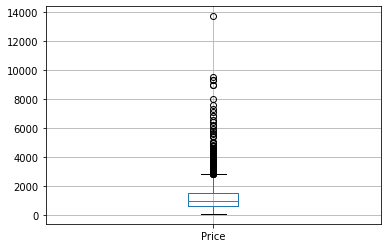

In [78]:
df.boxplot(column='Price')

When we look at the price distribution, there are outliers. We can remove them for the sake of our Machine Learnin model.

In [79]:
# function to detect outliers.
def outliers(df,feature):
    q1 = df[feature].quantile(0.25) # get the first quantile
    q3 = df[feature].quantile(0.75) # get the third quantile
    iqr = q3 - q1 # calculate the inter quantile range
    
    lower = q1 - 1.5 * iqr # calculate the upper range
    upper = q3 + 1.5 * iqr # calculate the lower range
    
    idx = df.index[(df[feature] < lower) | (df[feature] > upper)] # get the index values of outliers
    
    return idx # return the indexes

In [80]:
idx_list = outliers(df,'Price')
idx_list

Int64Index([   2,    8,    9,   12,   13,   14,   15,   16,   17,   23,
            ...
            1009, 1010, 1012, 1013, 1015, 1019, 1023, 1065, 1110, 1124],
           dtype='int64', length=159)

In [82]:
removed_outliers = df.drop(idx_list) # remove the outliers by index

<AxesSubplot:>

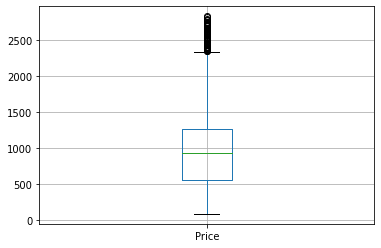

In [83]:
removed_outliers.boxplot(column='Price')

In [84]:
removed_outliers.to_csv("data/removed_outliers.csv",index=False)